# Tugas Decision Tree

## Import library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import dataset

Disini saya menggunakan dataset diabetes. Kita akan menentukan apakah seseorang memiliki diabetes dengan berdasarkan beberapa fakto seperti berikut :

- Gender
- Polyuria
- Polydipsia
- sudden weight loss
- weakness
dll

Lebih jelasnya dapat dilihat pada : https://www.kaggle.com/code/misbahbilgili/classification-decision-tree-from-scratch/data

In [3]:
df = pd.read_csv('diabetes_data_upload.csv')

## Exploratory Data Analysis

In [4]:
df.shape

(520, 17)

In [5]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
df = df.drop(['Age'], axis=1)
df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              520 non-null    object
 1   Polyuria            520 non-null    object
 2   Polydipsia          520 non-null    object
 3   sudden weight loss  520 non-null    object
 4   weakness            520 non-null    object
 5   Polyphagia          520 non-null    object
 6   Genital thrush      520 non-null    object
 7   visual blurring     520 non-null    object
 8   Itching             520 non-null    object
 9   Irritability        520 non-null    object
 10  delayed healing     520 non-null    object
 11  partial paresis     520 non-null    object
 12  muscle stiffness    520 non-null    object
 13  Alopecia            520 non-null    object
 14  Obesity             520 non-null    object
 15  class               520 non-null    object
dtypes: object(16)
memory usage

In [8]:
df.isnull().sum()

Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

## Mendeklarasikan feature vector dan target variable

Karena kita akan menentukan apakah seseorang memiliki laptop atau tidak, maka jadikan 'Has Laptop' sebagai target variable. Sedangkan column/field lain dijadikan feature vector.

In [9]:
X = df.drop(['class'], axis=1)
y = df['class']

## Pecah (Split) menjadi training dan test set

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train.shape, X_test.shape

((348, 15), (172, 15))

## Encode Categorical Variables

In [12]:
import category_encoders as ce

encoder = ce.OrdinalEncoder()

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [13]:
X_train

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
274,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
426,1,2,2,2,2,1,2,1,2,1,2,1,1,2,1
60,2,2,2,1,2,1,1,2,2,1,1,2,1,1,1
110,2,1,1,2,2,2,1,1,2,1,2,1,2,1,1
329,1,1,1,2,2,1,1,1,2,1,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2,1,2,2,2,2,1,2,2,1,2,2,1,1,1
106,1,1,2,2,2,1,1,1,2,1,1,2,2,2,2
270,2,2,2,2,2,2,1,1,1,1,2,2,1,1,1
435,1,2,2,2,2,1,1,1,1,1,1,2,2,1,1


In [14]:
X_test

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
275,1,2,1,1,1,1,1,1,2,1,2,2,1,2,1
93,2,2,2,1,2,1,1,2,2,1,1,2,2,1,1
6,1,2,2,1,2,1,2,2,1,1,2,2,2,1,1
167,1,2,2,2,2,1,2,1,2,2,1,1,2,1,2
90,2,1,1,1,1,1,1,1,2,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,2,1,1,1,1,2,2,2,2,1,2,1,2,2,1
16,1,2,2,2,2,2,2,2,1,1,2,1,1,1,1
484,2,2,2,2,2,1,1,2,1,1,1,2,2,1,1
370,1,1,1,1,1,1,2,2,1,1,1,1,2,1,1


## Decision Tree Classifier dengan Entropy

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

## Prediksi hasil dari Test set dengan entropy

In [16]:
y_pred_en = clf_en.predict(X_test)

## Cek skor akurasinya

In [17]:
from sklearn.metrics import accuracy_score

print('Skor akurasi: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Skor akurasi: 0.9302


## Bandingkan akurasi antara train set dengan test set

In [18]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positi

In [19]:
print('Skor akurasi Training set: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Skor akurasi Training set: 0.9052


In [20]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9052
Test set score: 0.9302


## Visualisasi decision tree

[Text(0.5769230769230769, 0.875, 'X[1] <= 1.5\nentropy = 0.971\nsamples = 348\nvalue = [139, 209]'),
 Text(0.3076923076923077, 0.625, 'X[0] <= 1.5\nentropy = 0.843\nsamples = 177\nvalue = [129, 48]'),
 Text(0.15384615384615385, 0.375, 'X[2] <= 1.5\nentropy = 0.586\nsamples = 135\nvalue = [116, 19]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.414\nsamples = 120\nvalue = [110, 10]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.971\nsamples = 15\nvalue = [6, 9]'),
 Text(0.46153846153846156, 0.375, 'X[13] <= 1.5\nentropy = 0.893\nsamples = 42\nvalue = [13, 29]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.625\nsamples = 32\nvalue = [5, 27]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.722\nsamples = 10\nvalue = [8, 2]'),
 Text(0.8461538461538461, 0.625, 'X[2] <= 1.5\nentropy = 0.321\nsamples = 171\nvalue = [10, 161]'),
 Text(0.7692307692307693, 0.375, 'X[8] <= 1.5\nentropy = 0.764\nsamples = 45\nvalue = [10, 35]'),
 Text(0.6923076923076923, 0.125, 'entropy = 0.0\nsamples = 2

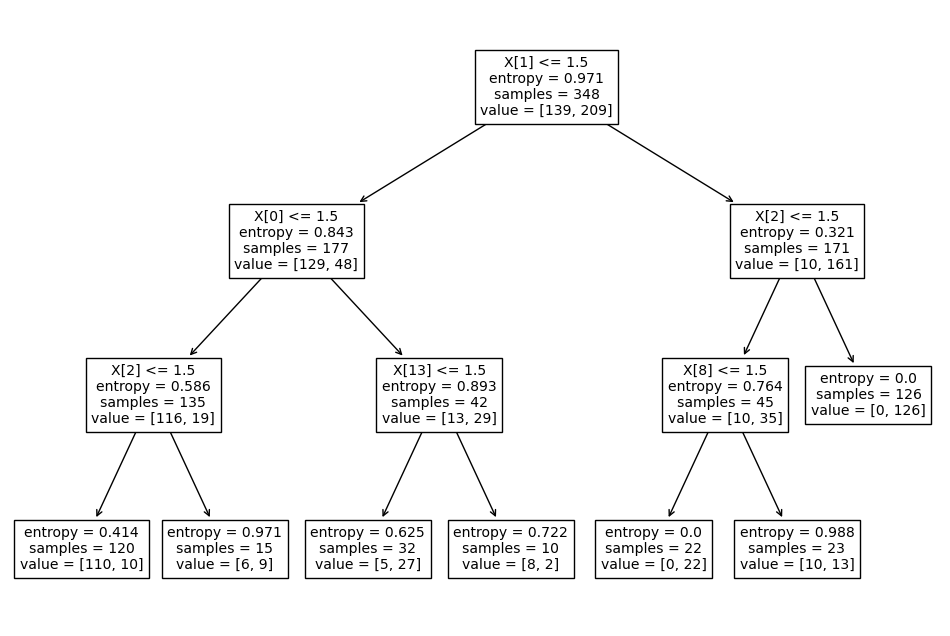

In [21]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

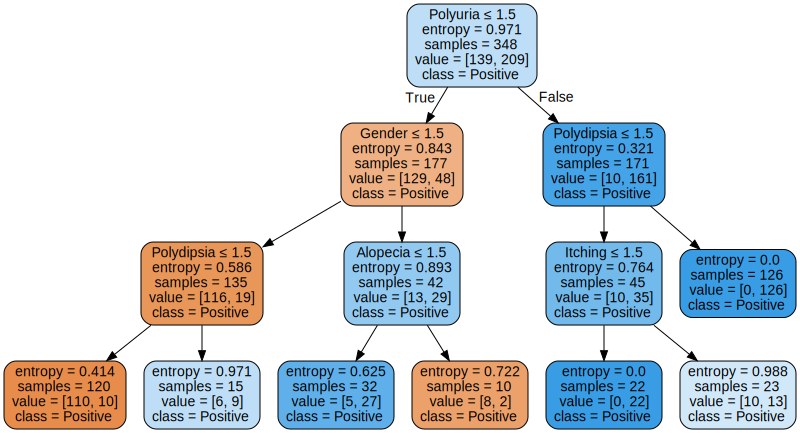

In [41]:
import graphviz
dot_data = tree.export_graphviz(clf_en, feature_names=X_train.columns,  filled=True, class_names=df['class'], rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph